$m$ là all example

$n$ là number of feature

$x_i$ là $m$ training example thứ $i$

$x_i^i$ là là $m$ training example thứ $i$ của $n$ feature thứ $i$

- Single variable: $Hypothesis: h_w(x) = w_0 + w_1x$
- Multiple variable: $Hypothesis: h_w(x) = w_0 + w_1x_1 + w_2x_2 + ...$
  - $h = w^TX = w_0 + w_1x_1 + w_2x_2 + ...$
- Cost function: $J(w_0,w_1,w_2,...) = \frac{1}{2m}∑(h(x^i) - y^i)^2$

# Feature Scaling
  - Standardization
$$x^/ = \frac{x - x^{tb}}{σ}$$

  - Mean Normalization
$$x^/ = \frac{x - mean(x)}{max(x) - min(x)}$$

  - Min - Max Scaling
$$x^/ = \frac{x - min(x)}{max(x) - min(x)}$$


# Normal Equation
  - Example: m = 4, n = 4
  - $h = θ^TX$
  - $θ = (X^TX)^{-1}X^Ty$

- $m$ training examples, $n$ training features.

- Gradient Descent
  - Need to choose learing rate $α$
  - Needs many iterations
  - Works well even when $n$ is large

- Normal Equation
  - No need to choose learing rate $α$
  - Don't need to iterate
  - Need to compute $(X^TX)^{-1}$
  - Slow if $n$ is very large

# What if $X^TX$ is non-invertible ?
  - Redundant feature (linearly dependent) các feat phụ thuộc lẫn nhau
    - E.g. x1 = size in feet$^2$
    - E.g. x2 = size in $m^2$
  - Too many features (e.g. $m ≤ n$)
    - Delete some feature
    - Use regularization

## Linear Regression with Multiple Variable

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Problem3.txt', header =None)

df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


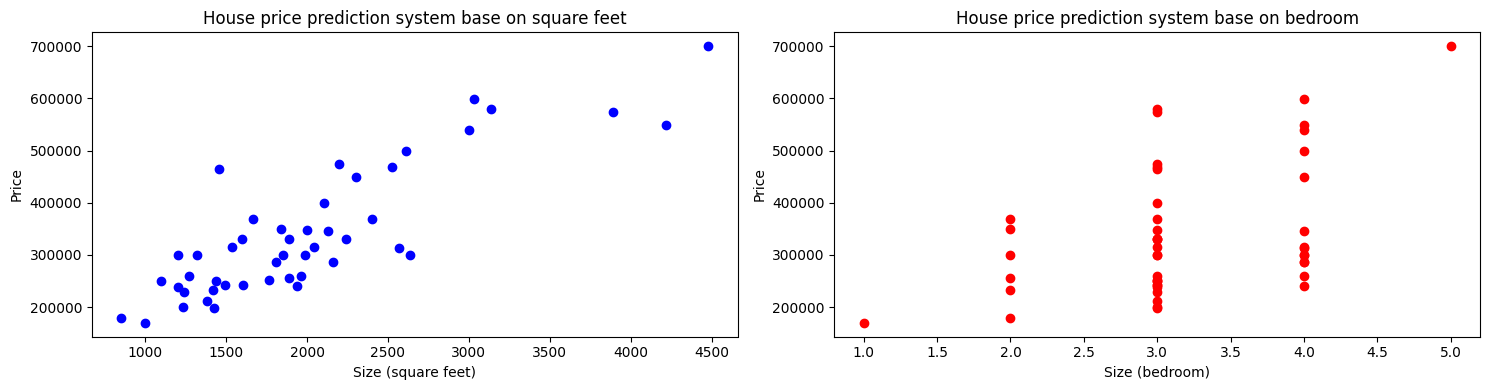

In [30]:
fig, axes = plt.subplots(figsize=(15,4),nrows = 1, ncols = 2) #Vẽ đồ thị trên cùng 1 bảng
color = ['blue', 'red']
cols = ['square feet', 'bedroom']
for i in range(len(cols)):
  axes[i].scatter(df[i], df[2], color=color[i])
  axes[i].set_xlabel("Size ({})".format(cols[i]))
  axes[i].set_ylabel("Price")
  axes[i].set_title("House price prediction system base on {}".format(cols[i]))
plt.tight_layout()


##Data normalization

In [12]:
# Mean Normalization
def Mean_Normalization(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X_normailized = (X - np.mean(X, axis=0))/np.std(X, axis=0)
  return X_normailized, mean, std

In [13]:
#Define the Cost function
def calculate_cost_value(x, y, theta):
  #theta = [[theta0],[theta1]]
  return 1/(2*len(y)) + np.sum((x.dot(theta) - y)**2)

#Define the Gradient Descent
def Gradient_Descent(X, y, theta, learning_rate, number_of_iteration=3000, epsilon=1e-5):
  m = len(y) #Tổng số examples
  costs_history = []

  for i in range(number_of_iteration):
    predictedValue = X.dot(theta) # [[1, x_i]] @ [[theta0],[theta1]]
    error = np.dot(X.transpose(), predictedValue - y)
    gradient = learning_rate * 1/m * error
    theta -= gradient # when gradient > 0
    costs_history.append(calculate_cost_value(X, y, theta))

  return theta, costs_history

In [14]:
#Hàm dự đoán h(x)
def predict(X, theta):
  return np.dot(theta.transpose(), X)

In [34]:
data_value = df.values # lấy dữ liệu dataset
m = len(data_value[:,1]) # all example
X = data_value[:,0:2].reshape(m,2) #lấy X
y = data_value[:,-1].reshape(m,1) #lấy y

In [35]:
X_normalized, mean, std = Mean_Normalization(X) #gọi hàm lấy X_normalize, mean, std

In [36]:
X = np.append(np.ones((m,1)),X_normalized, axis=1)
theta = np.zeros((3,1))

In [37]:
theta, history = Gradient_Descent(X, y, theta, learning_rate=0.1, number_of_iteration=400)
print("$h(x) = {} + {}x1 + {}x2".format(theta[0,0], theta[1,0], theta[2,0]))

$h(x) = 340412.65957446786 + 109447.79558638527x1 + -6578.353970904726x2


In [38]:
print(history)

[5007216434519.02, 4078573928636.9497, 3332998457617.6133, 2733572137124.957, 2251025420593.78, 1862099857338.2795, 1548275018662.9727, 1294775115089.3416, 1089791276353.6044, 923870763953.9724, 789435876261.6465, 680403971314.9183, 591886593844.2827, 519950682081.25604, 461428638956.1494, 413766972335.0703, 374905456446.3677, 343180503257.37683, 317247779480.7853, 296020153344.9444, 278617874204.8734, 264328529828.73032, 252574830645.12735, 242888667893.03842, 234890206920.8163, 228271025915.7532, 222780508110.89624, 218214852891.5781, 214408196695.42365, 211225434805.96387, 208556415293.0971, 206311240556.52255, 204416463420.03522, 202812006068.76434, 201448663351.78903, 200286078705.8885, 199291102480.40225, 198436459786.05713, 197699668973.65955, 197062163129.301, 196508576078.2817, 196026161743.22665, 195604321642.6647, 195234220117.8361, 194908470757.5821, 194620880630.9253, 194366241477.0903, 194140159058.34113, 193938913544.9812, 193759345149.14697, 193598760315.16486, 19345485

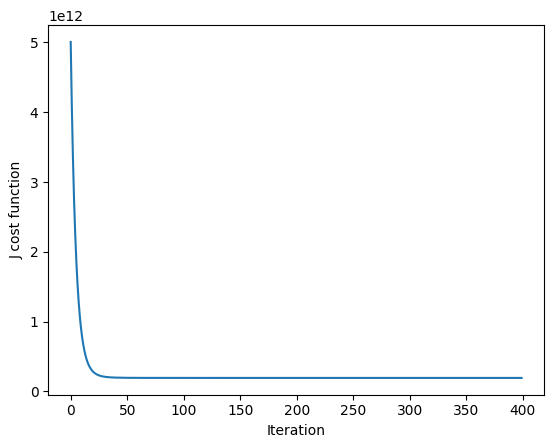

In [39]:
#Vẽ đồ thị J cost function
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("J cost function")
plt.show()

In [41]:
#Hàm chuẩn hóa scaling Input User
def normalizeInputDataForUser(X, mean, std):
  X_normailized = (X - mean)/std
  return X_normailized, mean, std

In [42]:
input = np.array([1650, 4]) #nhập dữ liệu
normalizeInput = normalizeInputDataForUser(input, mean, std)[0] #chuẩn hóa dữ liệu
normalizeInput = np.append(np.ones(1), normalizeInput) #[ 1.  1. -1.]

In [43]:
print(normalizeInput)

[ 1.         -0.44604386  1.10220517]


In [44]:
#dự đoán giá
print(predict(normalizeInput, theta))

[284343.44659007]


##Normal Equation

In [46]:
from sklearn.datasets import make_regression

In [47]:
#m = 100 n = 1 noise ép nghĩa
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=42)

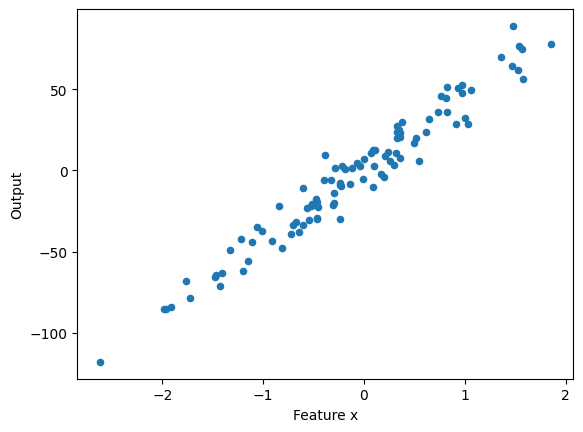

In [48]:
plt.scatter(X, y, s=20, marker='o')
plt.xlabel('Feature x')
plt.ylabel("Output")
plt.show()

In [49]:
m = len(X) # all example
X_new = np.array([np.ones(m), X.flatten()]).T
y_new = y.reshape(m,1)

In [50]:
#Tính theta
theta = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y_new)

In [53]:
prediction_result = X_new.dot(theta)

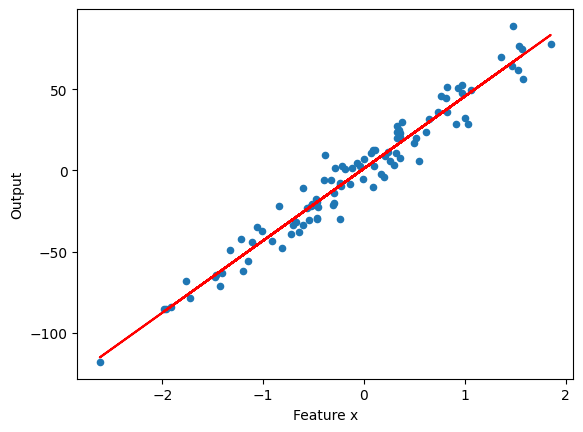

In [54]:
plt.scatter(X, y, s=20, marker='o')
plt.plot(X, prediction_result,color='red')
plt.xlabel('Feature x')
plt.ylabel("Output")
plt.show()

In [70]:
data_value = df.values
m = len(data_value[:,1])
X = data_value[:,0:2].reshape(m,2)
y = data_value[:,-1].reshape(m,1)

In [71]:
X_normalized, mean, std = Mean_Normalization(X)

In [72]:
X = np.append(np.ones((m,1)),X_normalized, axis=1)

In [73]:
#Tính theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [75]:
prediction_result = X.dot(theta)

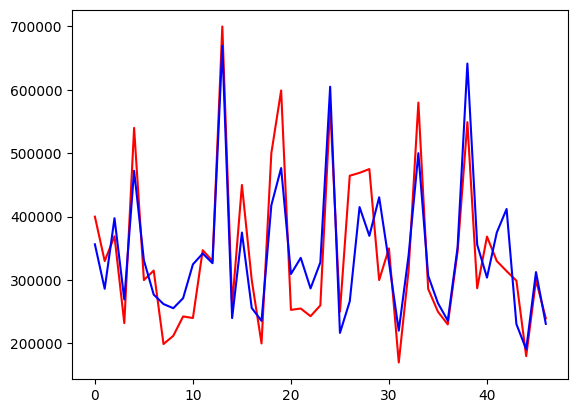

In [76]:
plt.plot(y, color='r')
plt.plot(prediction_result, color='b')
plt.show()